In [1]:
import csv
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

import pandas as pd
import random


from collections import OrderedDict
from os import listdir
from os.path import isfile, isdir, join, exists

In [7]:
tips = sns.load_dataset("tips")

In [8]:
#plt.rcParams['figure.figsize'] = [10,5]
#plt.rcParams['patch.force_edgecolor'] = True
#plt.rcParams['font.size'] = 14

In [9]:
def human_format(num, round_to=2):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num = round(num / 1000.0, round_to)
    return '{:.{}f}{}'.format(round(num, round_to), round_to, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

In [10]:
datasetpath = '../../src/datasets/'
data = [ f for f in listdir(datasetpath) if isdir(join(datasetpath, f))] 
data = data[:2]
data



['Emailcontacts', 'EmailURV']

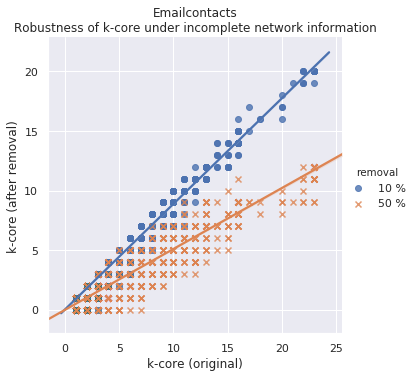

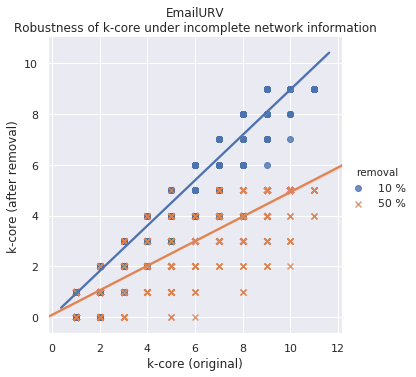

In [11]:
for dataset in data:
    dataframe = pd.DataFrame()
    G = nx.Graph()
    with open(join(datasetpath,dataset,dataset+'.csv'), 'r') as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            G.add_edge(int(row[0]), int(row[1]))

    per10 = len(G.edges()) *10 // 100 
    per40 = len(G.edges()) * 40 // 100
    edgelist = list(G.edges)

    k = list(OrderedDict(sorted(dict(nx.core_number(G)).items())).values())
    d = list(OrderedDict(sorted(dict(nx.degree(G)).items())).values())
    kk = [float(el) for el in k]
    dd = d
    
    # remove 10%
    for i in range(per10):
        removed = edgelist.pop(random.randrange(len(edgelist)))
        G.remove_edge(*removed)
    
    k = list(OrderedDict(sorted(dict(nx.core_number(G)).items())).values())
    d = list(OrderedDict(sorted(dict(nx.degree(G)).items())).values())
    dataframe = dataframe.append(pd.DataFrame(data={
        "k-core (original)" : kk,
        "k-core (after removal)" : [float(el) for el in k],
        "removal" : ["10 %"] * len(k),
    }))
    
    # remove 40%
    for i in range(per40):
        removed = edgelist.pop(random.randrange(len(edgelist)))
        G.remove_edge(*removed)
    
    k = list(OrderedDict(sorted(dict(nx.core_number(G)).items())).values())
    d = list(OrderedDict(sorted(dict(nx.degree(G)).items())).values())
    dataframe = dataframe.append(pd.DataFrame(data={
        "k-core (original)" : kk,
        "k-core (after removal)" : [float(el) for el in k],
        "removal" : ["50 %"] * len(k),
    }))
    
    #ax = sns.lmplot(x="k-core-original", y="k-core-after-removal", 
    #                hue="removal",
    #                data=dataframe, )#markers=['o', 'x'])
    ax = sns.lmplot(x="k-core (original)", y="k-core (after removal)",
                    hue="removal",
                    data=dataframe,
                    markers=['o', 'x']
                   )
    plt.title(dataset+"\nRobustness of k-core under incomplete network information")
    #plt.show()
    plt.savefig("robustnesskcore"+dataset+".png")
